<a href="https://colab.research.google.com/github/ericasrafael/api_bc_ipca/blob/main/IPCA_BANCO_CENTRAL_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### API BANCO CENTRAL

O exercício a ser desenvolvido para a presente unidade consiste em conectar-se a uma API. O Banco Central do Brasil disponibiliza dados a respeito de diversos indicadores econômicos do país. Sua tarefa será encontrar a série histórica relativa à inflação (IPCA) na plataforma de dados abertos do BC, importá-la e transformá-la em um DataFrame do Pandas.

link banco de dados --> https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

link api --> http://api.bcb.gov.br/dados/serie/bcdata.sgs.20542/dados?formato=json

código de acesso aos dados históricos de ipca --> 433


In [23]:
import pandas as pd
import requests
import json
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [24]:
# pelo método pd.read_json()

def consulta_bc_read_json(cod):
  url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{cod}/dados?formato=json'
  df = pd.read_json(url)
  # coluna data está no formato dia/mes/ano, primeira informação é o dia
  df['data'] = pd.to_datetime(df['data'], dayfirst=True )
  return df

consulta_bc_read_json(433)

,data,valor
0,1980-01-01,6.62
1,1980-02-01,4.62
2,1980-03-01,6.04
3,1980-04-01,5.29
4,1980-05-01,5.70
...,...,...
503,2021-12-01,0.73
504,2022-01-01,0.54
505,2022-02-01,1.01
506,2022-03-01,1.62


In [28]:
# por requests.get() e json()

def consulta_bc_requests(cod):
  url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{cod}/dados?formato=json'
  response = requests.get(url)
  return pd.DataFrame(response.json())

ipca = consulta_bc_requests(433)
# retorna uma lista de dicionários, cada dicioário um registro

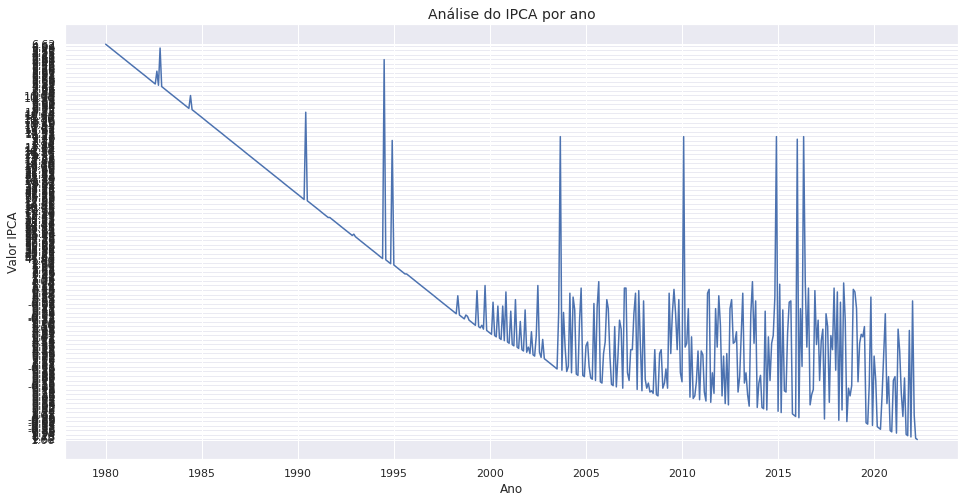

In [49]:
ipca['data'] = pd.to_datetime(ipca['data'], dayfirst=True )
sns.set_theme(style="darkgrid")

grafico = sns.lineplot(x="data", y="valor", data=ipca)
plt.xlabel( "Ano") 
plt.ylabel( "Valor IPCA") 
plt.title( "Análise do IPCA por ano" , size = 14 ) 
plt.show()